# **금융경제학**

- 금융경제학 (박기영 저, 시그마프레스) 교재에 사용된 데이터/모형/그래프 관련 작업을 수행하는 python notebook 파일임: https://github.com/FinancialEconomicsPython
- python 코드는 구글 코랩에서 사용하는 것을 기준으로 작성되었음.
- 데이터 파일이 필요한 경우 위치: https://drive.google.com/drive/folders/1sArqUZKnxWtkNtHe31iD1w-2xCVEhTj0?usp=share_link
- date: 2025/3/22, updated: 2026/1/30

# 사전준비
## 수정이 필요한 부분

- 아래 셀에서 BASE에는 본인의 구글 드라이브 경로, key_api_ECOS에는 본인의 한국은행 ECOS open API key를 입력해야 합니다.
  - 한국은행 ECOS open API key 신청은 다음 링크에서 할 수 있습니다: https://ecos.bok.or.kr/api/#/

- UTILS, FIGS의 경우 BASE에서 지정한 폴더 아래 UTILS, FIGS 폴더를 동일하게 만들고 해당 폴더에 있는 파일들을 저장할 경우 수정할 필요 없습니다.



In [ ]:
# ============================
# 🎯 사용자별 맞춤 설정 영역
# ============================

# Google Drive 상 Colab 프로젝트 기본 폴더 경로 (각자 환경에 맞게 수정)
BASE = "/content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics"

# 한국은행 ECOS API 인증키 (개인별 발급)
key_api_ECOS = "YOUR_ECOS_API_KEY_HERE"

if ("YOUR_ECOS_API_KEY_HERE" in key_api_ECOS):
    print("⚠️ ECOS API 인증키가 설정되지 않았습니다.")
    print("   'key_api_ECOS'에 본인의 API 키를 입력한 뒤 다시 실행하세요.")
    raise SystemExit

# 서브폴더 지정 (utils, figures 등)
UTILS = f"{BASE}/utils"
FIGS  = f"{BASE}/figures"

## Preamble 및 필요한 라이브러리/함수 불러오기
- PublicDataReader 라이브러리 불러오기
- utils 폴더에 있는 preamble_core.py 불러오기
  - google drive 연결
  - 출력 DPI 조정
- utils 폴더에 있는 plot_utils.py 불러오기
  - plot_dual_axis를 이용해서 y축 왼쪽, 오른쪽 모두 사용하는 그림 그리기
- koreanize_matplotlib 라이브러리: 그림에서 한글 깨짐 방지

In [ ]:
# PublicDataReader 라이브러리 불러오기
!pip -q install publicdatareader
from PublicDataReader import Ecos

# ============================
# 📦 Preamble 불러오기
# ============================

from google.colab import drive
drive.mount("/content/drive")

import sys, os, importlib
if UTILS not in sys.path:
    sys.path.append(UTILS)

# preamble_core 불러오기
from preamble_core import setup_notebook, bind_env, save_fig

# 노트북 공통 환경 설정
setup_notebook(save_dir=FIGS, seaborn_use=True)
bind_env(globals())   # Colab에서도 plt/np/pd 활성화

# Colab 화면 출력용/파일 저장용 DPI 설정
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 100   # 화면 렌더링
plt.rcParams["savefig.dpi"] = 600  # 파일 저장

# 그래프 그리는 plot_dual_axis() 불러오기
import plot_utils
importlib.reload(plot_utils)
from plot_utils import plot_dual_axis

# koreanize_matplotlib 설치
# 1. 라이브러리 설치 (이미 되어 있다면 생략 가능)
!pip install koreanize-matplotlib

# 2. 임포트
import koreanize_matplotlib
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Notebook environment initialized.
📂 Figures will be saved to: /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures


## NBER recession dates 불러오기
- utils 폴더의 nber_utils를 통해 NBER recession dates 불러오기

✅ nber_utils ready (functions: load_and_process_nber_data, plot_nber_recession)
✅ NBER recession data loaded successfully.
📅 Number of cycles detected: 34
✅ NBER monthly cycles loaded: 34 periods


,peak,trough
26,1969-12-01,1970-11-01
27,1973-11-01,1975-03-01
28,1980-01-01,1980-07-01
29,1981-07-01,1982-11-01
30,1990-07-01,1991-03-01
31,2001-03-01,2001-11-01
32,2007-12-01,2009-06-01
33,2020-02-01,2020-04-01


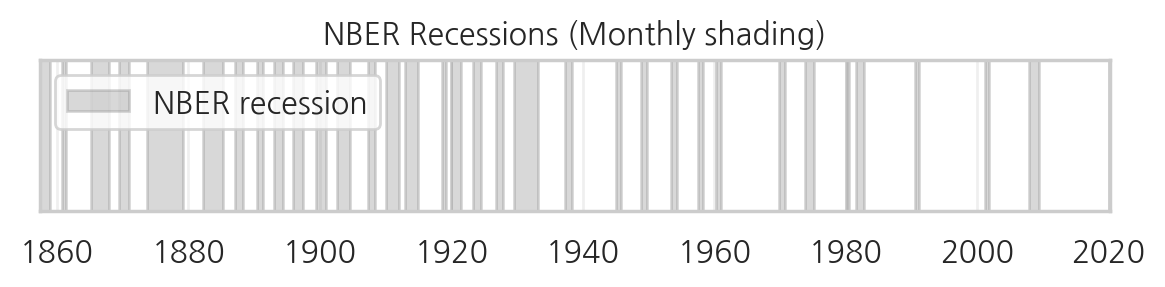

In [ ]:
# ============================
# 📊 NBER 경기순환 데이터 로딩
# ============================

import nber_utils

# Colab 전역 네임스페이스에 함수 주입 (load_and_process_nber_data, plot_nber_recession)
if hasattr(nber_utils, "bind_env"):
    nber_utils.bind_env(globals())
else:
    print("⚠️ bind_env() not found in nber_utils (확인 필요).")

# NBER Business Cycle Dating Committee spreadsheet
url = "https://www.nber.org/sites/default/files/2023-03/BCDC_spreadsheet_for_website.xlsx"
NBERm, NBERq = nber_utils.load_and_process_nber_data(url)

print(f"✅ NBER monthly cycles loaded: {len(NBERm)} periods")
display(NBERm.tail(8))

# ============================
# 🖼️ 예시: 경기침체 구간 시각화
# ============================

fig, ax = plt.subplots(figsize=(6, 1.6))
ax.set_xlim(pd.Timestamp("1961-01-01"), pd.Timestamp("2025-12-31"))
ax.set_ylim(0, 1)
ax.set_yticks([])

plot_nber_recession(ax, NBERm, clip_to_xlim=True, keep_xlim=True, label="NBER recession")

ax.set_title("NBER Recessions (Monthly shading)", fontsize=11)
ax.grid(True, alpha=0.3)
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()

# Main

## 일본 관련
### 니케이 지수, 장단기 금리


In [ ]:
# Nikkei Stock Average, Nikkei 225 (NIKKEI225), daily
# Interest Rates: 3-Month or 90-Day Rates and Yields: Certificates of Deposit: Total for Japan (IR3TCD01JPM156N), May 1979 to Mar 2022 (2022-05-12)
# Interest Rates: Long-Term Government Bond Yields: 10-Year: Main (Including Benchmark) for Japan (IRLTLT01JPM156N), Jan 1989 to Jun 2025

var_list = ['NIKKEI225', 'IR3TCD01JPM156N','IRLTLT01JPM156N']
start = date(1985,1,1)
end = date(2025,6,30)

df_jpn = pdr.get_data_fred(var_list, start=start, end=end)
df_jpn.columns = ['Nikkei','CD3m','GB10y']

df_jpn_mon = df_jpn.resample('ME').mean()
df_jpn_mon.head(3)

,Nikkei,CD3m,GB10y
DATE,,,
1985-01-31,"11,800.218",6.378,NaN
1985-02-28,"12,075.499",6.455,NaN
1985-03-31,"12,468.405",6.488,NaN


Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/Japan_Nikkei.png


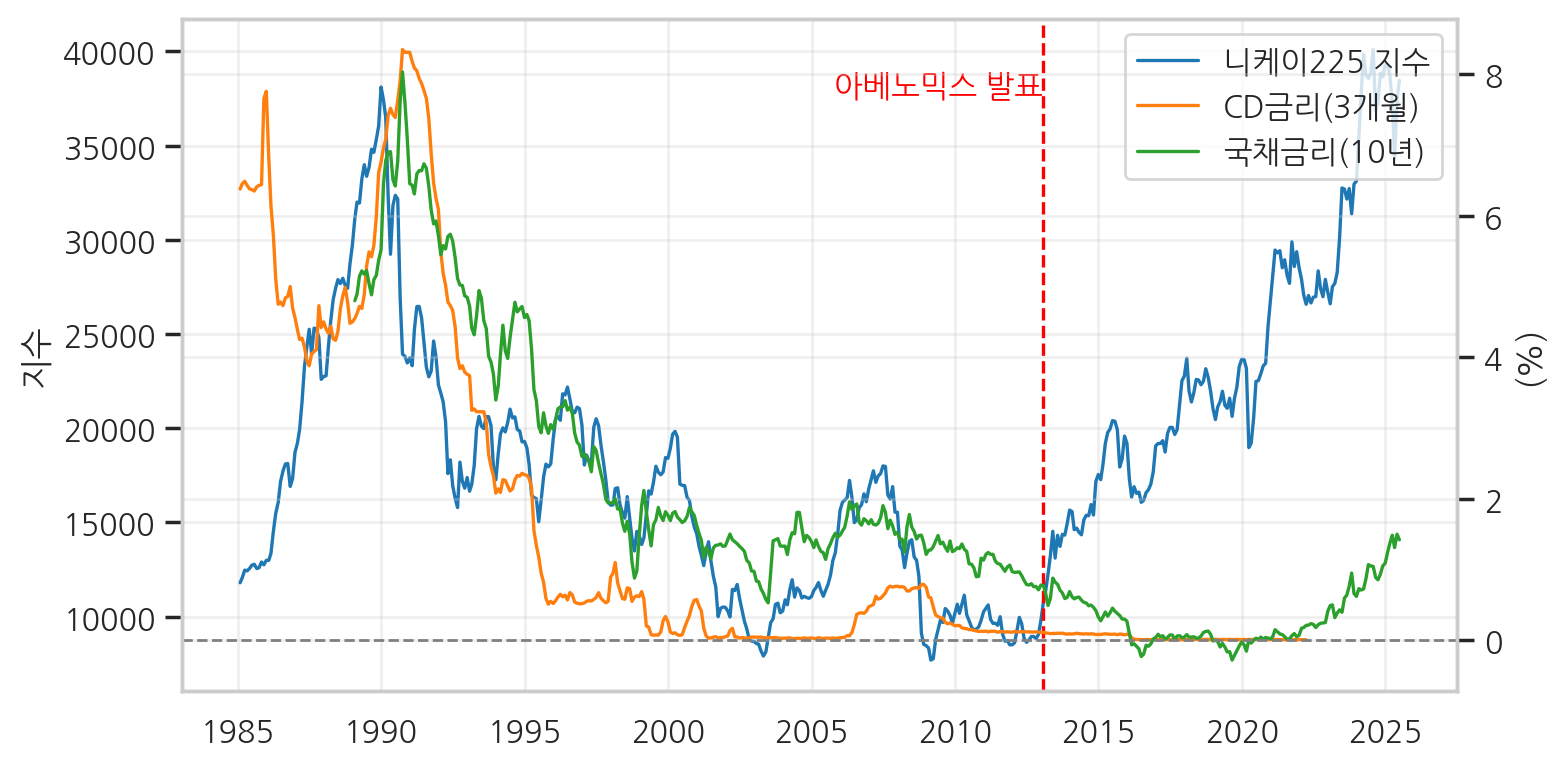

In [ ]:
fig, ax1, ax2 = plot_dual_axis(
    df_jpn_mon,
    left_vars=['Nikkei'],
    right_vars=['CD3m', 'GB10y'],
    vlines=[(date(2013, 1, 22), "아베노믹스 발표", 'red', '--', 1.2, 'left', 0.9)],
    hlines=[(0, "", "gray", "right")],  # 오른쪽 y축에 0% 수평선
    left_label='지수',
    right_label='(%)',
    color_mode='default',
    linewidth=1.2,
    legend_labels=['니케이225 지수', 'CD금리(3개월)', '국채금리(10년)'],
    legend_fontsize=11,
    legend_loc="upper right",
    return_axes=True,
    show=False
)

save_fig('Japan_Nikkei')
plt.tight_layout()
plt.show()

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/Japan_Nikkei.png


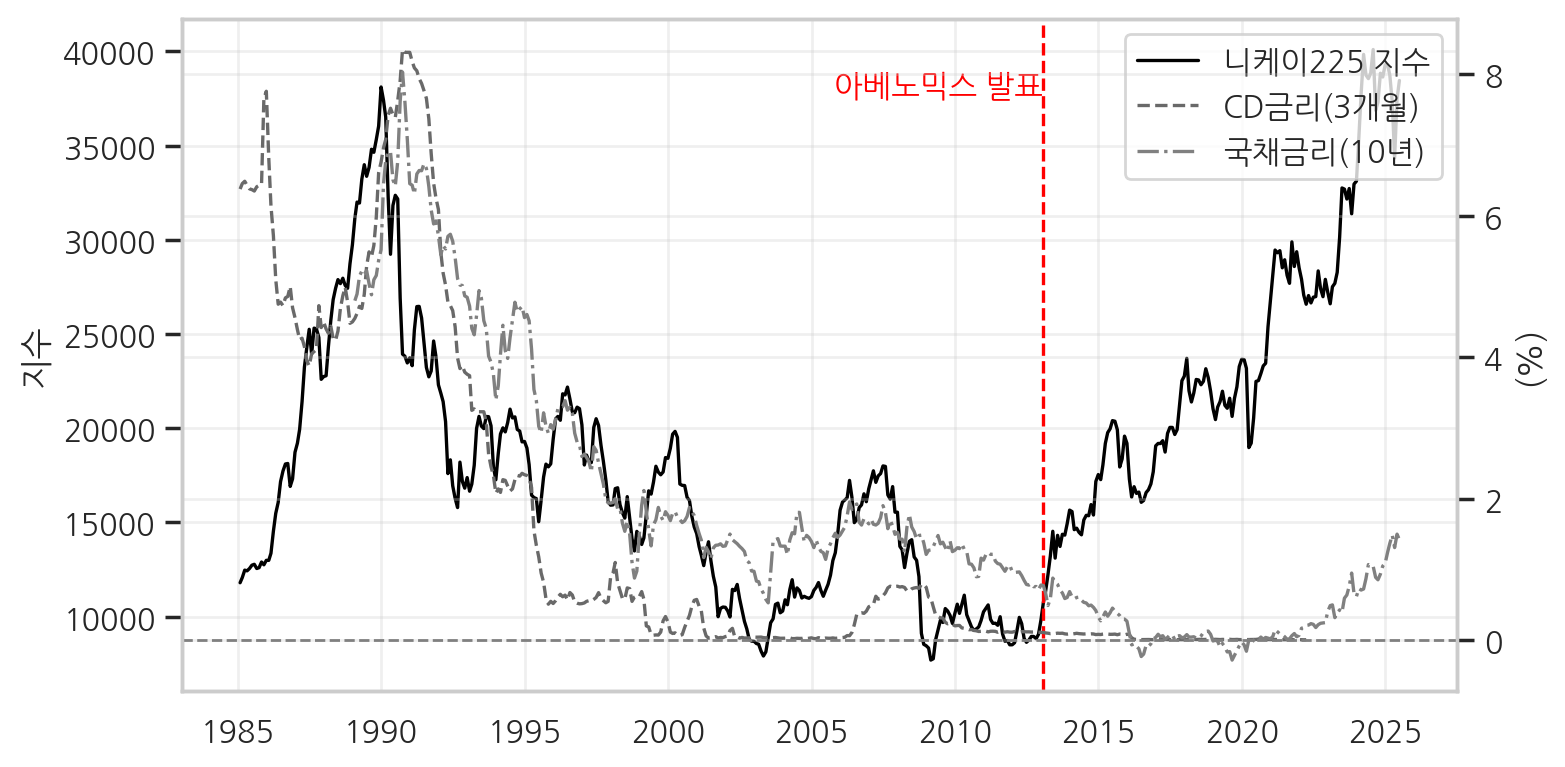

In [ ]:
fig, ax1, ax2 = plot_dual_axis(
    df_jpn_mon,
    left_vars=['Nikkei'],
    right_vars=['CD3m', 'GB10y'],
    vlines=[(date(2013, 1, 22), "아베노믹스 발표", 'red', '--', 1.2, 'left', 0.9)],
    hlines=[(0, "", "gray", "right")],  # 오른쪽 y축에 0% 수평선
    left_label='지수',
    right_label='(%)',
    color_mode='bw',
    linewidth=1.2,
    legend_labels=['니케이225 지수', 'CD금리(3개월)', '국채금리(10년)'],
    legend_fontsize=11,
    legend_loc="upper right",
    return_axes=True,
    show=False
)

save_fig('Japan_Nikkei')
plt.tight_layout()
plt.show()

### GDP 대비 중앙은행 자산 비교: 한국, 미국, 일본

In [ ]:
# Central Bank Assets to GDP for United States (DDDI06USA156NWDB)
# Central Bank Assets to GDP for Japan (DDDI06JPA156NWDB)
# Central Bank Assets to GDP for Republic of Korea (DDDI06KRA156NWDB)

var_list = ['DDDI06JPA156NWDB', 'DDDI06USA156NWDB','DDDI06KRA156NWDB']
start = date(1960,1,1)
end = date(2022,6,30)

df_bs = pdr.get_data_fred(var_list, start=start, end=end)
df_bs.columns = ['일본','미국','한국']

df_bs.head(3)

,일본,미국,한국
DATE,,,
1960-01-01,2.470,4.975,11.411
1961-01-01,1.339,5.109,11.311
1962-01-01,2.017,5.047,11.280


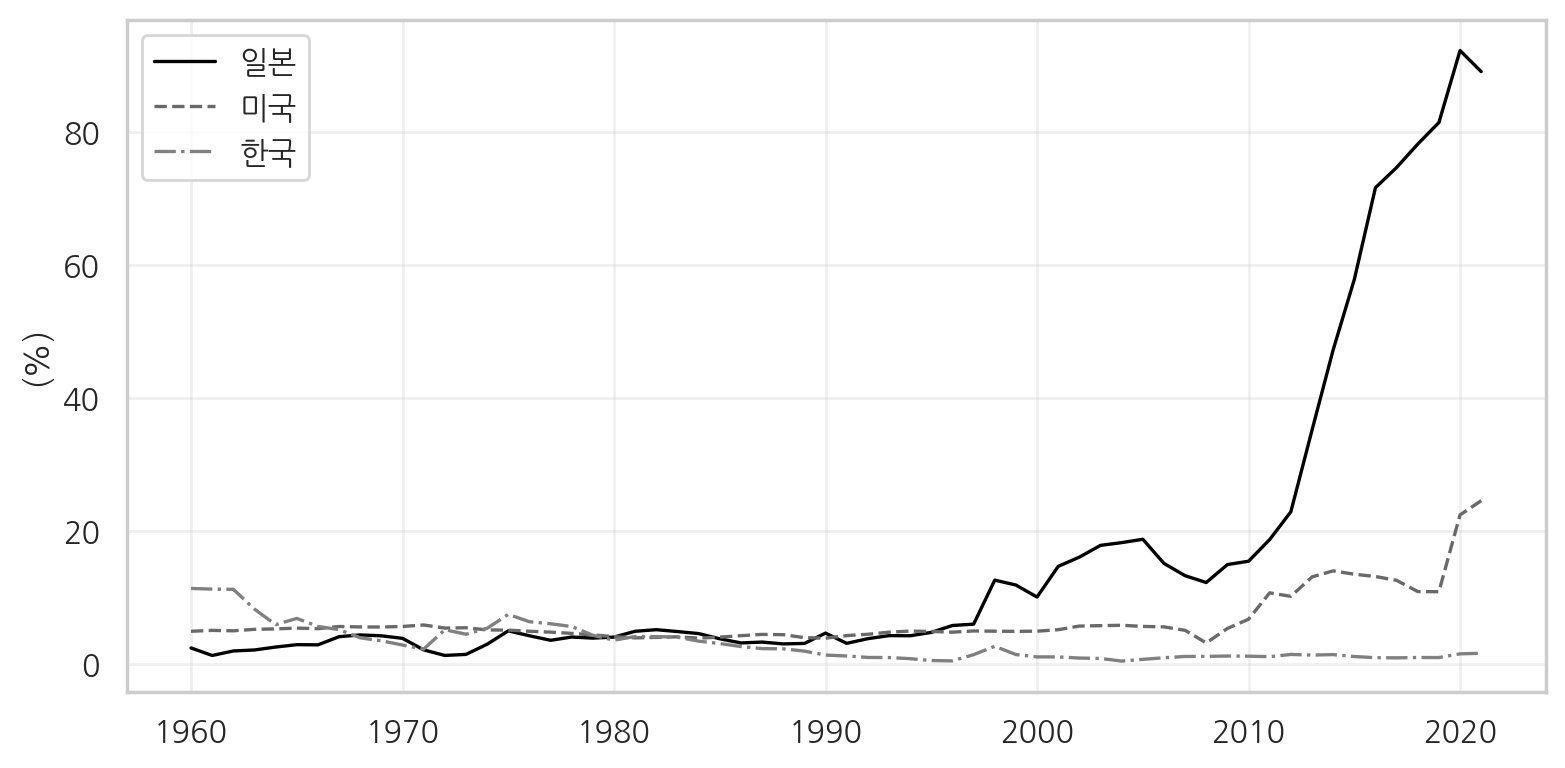

In [ ]:
plot_dual_axis(
    df_bs,
    left_vars=['일본','미국','한국'],
    left_label='(%)',
    color_mode='bw',
    linewidth=1.2,
    legend_loc = 'best',
    return_axes=False,
    show=True
)

### 인플레이션 목표와 실제 인플레이션

In [ ]:
# Consumer Price Indices (CPIs, HICPs), COICOP 1999: Consumer Price Index: Total for Japan  (JPNCPIALLMINMEI)
# Consumer Price Indices (CPIs, HICPs), COICOP 1999: Consumer Price Index: All Items Non-Food Non-Energy for Japan  (CPGRLE01JPM659N)

var_list = ['JPNCPIALLMINMEI', 'CPGRLE01JPM659N']
start = date(1980,1,1)
end = date(2021,6,30)

df_price = pdr.get_data_fred(var_list, start=start, end=end)
df_price.columns = ['CPI','코어']

df_price['CPI'] = 100*df_price['CPI'].pct_change(12)
df_price.dropna(inplace=True)

df_price.head(3)


,CPI,코어
DATE,,
1981-01-01,7.397,6.082
1981-02-01,6.347,5.650
1981-03-01,6.031,5.363


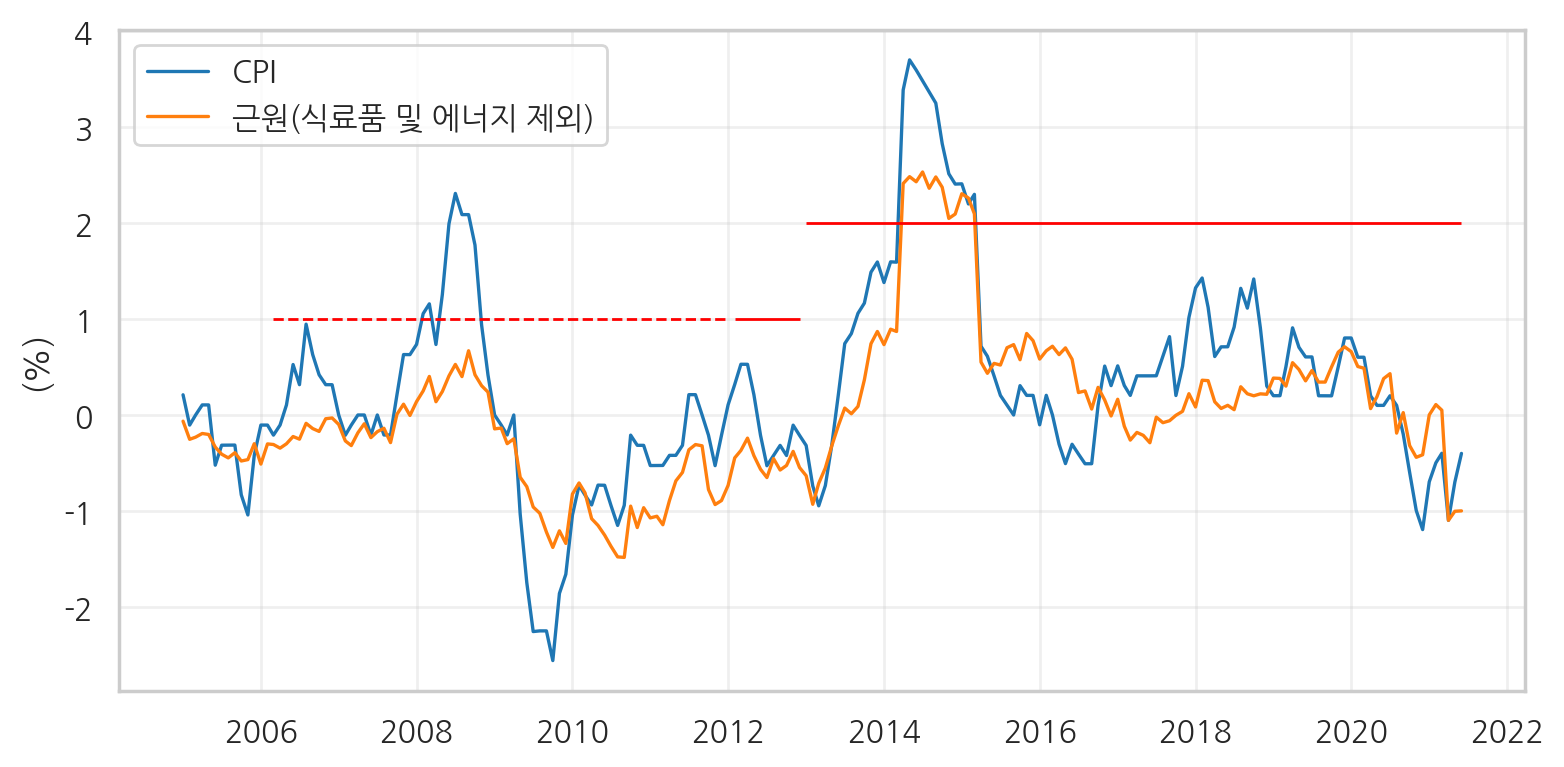

In [ ]:
df2005 = df_price.loc['2005':, :]

start1 = pd.Period('2006-03', freq='M').start_time
end1   = pd.Period('2012-01', freq='M').start_time
start2 = pd.Period('2012-02', freq='M').start_time
end2   = pd.Period('2012-12', freq='M').start_time
start3 = pd.Period('2013-01', freq='M').start_time
end3   = pd.Period('2021-06', freq='M').start_time

plot_dual_axis(
    df=df2005,
    left_vars=['CPI', '코어'],
    legend_labels=['CPI','근원(식료품 및 에너지 제외)'],
    legend_loc='upper left',
    linewidth=1.2,
    figsize=(8,4),
    left_label='(%)',
    y_left_format='{x:,.0f}',
    hlines=[
        (1.00, '', 'red', 'left', start1, end1, '--'),
        (1.00, '', 'red', 'left', start2, end2, '-'),
        (2.00, '', 'red', 'left', start3, end3, '-'),
    ]
)

## 중립금리 (NY Fed, LW 및 HLW 추정치)

- NY 연준 사이트에서 LW, HLW 중립금리 추정치와 R 코드를 제공하고 있음: https://www.newyorkfed.org/research/policy/rstar

In [ ]:
# LW 중립금리 추정치 불러오기
url = "https://www.newyorkfed.org/medialibrary/media/research/economists/williams/data/Laubach_Williams_current_estimates.xlsx"

# 엑셀 파일 읽기 (시트명은 기본적으로 첫 번째 시트, 필요시 names 지정)
df = pd.read_excel(url, sheet_name='data')

# 열 이름으로 추출하는 좋은 방식 (파일 구조에 따라 이름은 다를 수 있음)
date_col = df.iloc[5:, 0]
rstar = df.iloc[5:, 2]
g = df.iloc[5:, 3]

# DataFrame으로 재구성
df_LW = pd.DataFrame({
    'Date': date_col,
    'rstar_LW': rstar,
    'g_LW': g
})

# Date 열을 datetime으로 변환 (형식에 따라 format 지정)
df_LW['Date'] = pd.PeriodIndex(df_LW['Date'], freq='Q').to_timestamp()
df_LW.set_index('Date', inplace=True)

print(df_LW.head())

           rstar_LW  g_LW
Date                     
1961-01-01    5.124 4.856
1961-04-01    5.343 5.058
1961-07-01    5.292 5.008
1961-10-01    5.272 4.992
1962-01-01    5.112 4.838


In [ ]:
# HLW 중립금리 추정치 불러오기: 미국, EU, 캐나다
url = "https://www.newyorkfed.org/medialibrary/media/research/economists/williams/data/Holston_Laubach_Williams_current_estimates.xlsx"

# 엑셀 파일 읽기 (시트명은 기본적으로 첫 번째 시트, 필요시 names 지정)
df_HLW = pd.read_excel(url, sheet_name='HLW Estimates')

df_HLW = df_HLW.iloc[5:,[0,2,3,4,10,11,12]]
df_HLW.columns = ['Date', 'g_US', 'g_CAN','g_EU', 'rstar_US', 'rstar_CAN','rstar_EU']

# Convert 'Date' column to datetime objects
df_HLW['Date'] = pd.PeriodIndex(df_HLW['Date'], freq='Q').to_timestamp()
df_HLW.set_index('Date', inplace=True)

df_HLW.head(10)


,g_US,g_CAN,g_EU,rstar_US,rstar_CAN,rstar_EU
Date,,,,,,
1961-01-01,4.979,3.145,NaN,5.415,3.551,NaN
1961-04-01,5.180,4.913,NaN,5.641,5.602,NaN
1961-07-01,5.085,5.308,NaN,5.539,6.059,NaN
1961-10-01,5.054,4.874,NaN,5.502,5.555,NaN
1962-01-01,4.874,5.376,NaN,5.310,6.138,NaN
1962-04-01,4.390,4.793,NaN,4.778,5.468,NaN
1962-07-01,4.291,4.775,NaN,4.667,5.448,NaN
1962-10-01,3.895,5.011,NaN,4.223,5.721,NaN
1963-01-01,3.877,4.711,NaN,4.208,5.372,NaN


Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/rstar_g.png


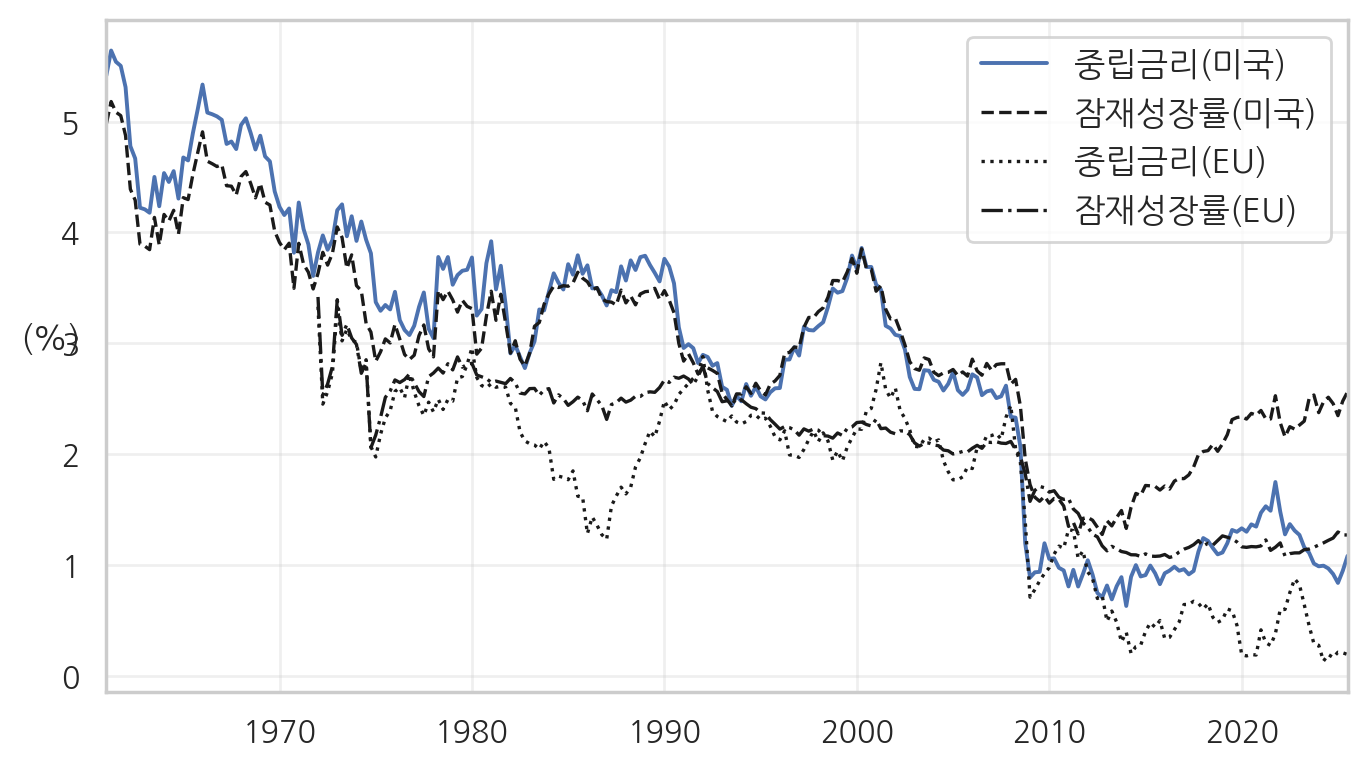

In [ ]:
# 중립금리, 잠재GDP: 미국과 EU
df_plot = df_HLW.loc[:,['g_US', 'g_EU', 'rstar_US', 'rstar_EU']]

start_date = 1961
end_date = 2025

linewidth = 1.2
ax = df_plot.loc[str(start_date):str(end_date),'rstar_US'].plot(figsize=(7,4), linewidth=1.4)
ax = df_plot.loc[str(start_date):str(end_date),'g_US'].plot(color='k', linestyle='--', linewidth=linewidth)
ax = df_plot.loc[str(start_date):str(end_date),'rstar_EU'].plot(color='k', linestyle=':', linewidth=linewidth)
ax = df_plot.loc[str(start_date):str(end_date),'g_EU'].plot(color='k', linestyle='-.', linewidth=linewidth)

plt.legend(labels=['중립금리(미국)','잠재성장률(미국)','중립금리(EU)','잠재성장률(EU)'],
           fontsize=12, loc='upper right')

plt.xlabel('')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel('(%)', rotation=0)
ax.grid(True)

save_fig('rstar_g')
plt.show()

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/rstar_LW_HLW.png


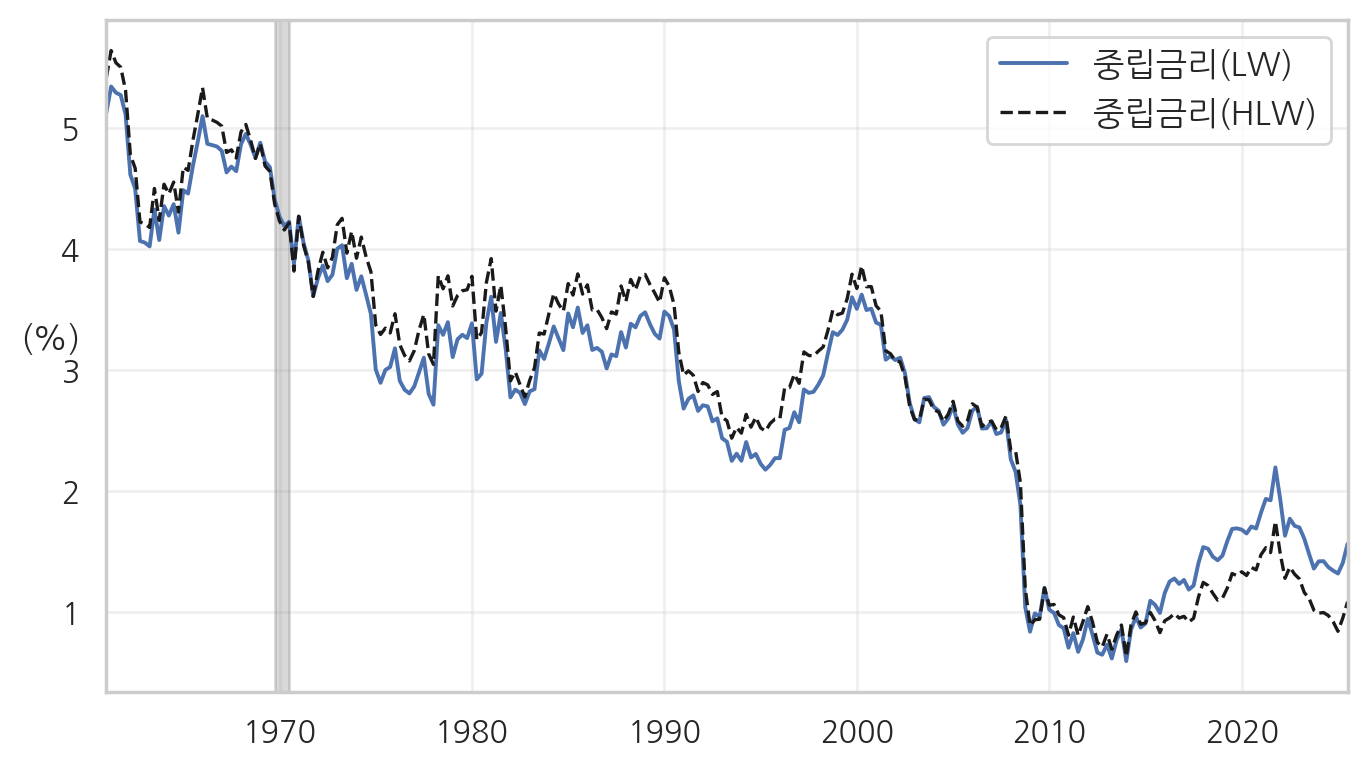

In [ ]:
# LW와 HLW 비교: 미국의 경우
df_compare = pd.concat([df_LW['rstar_LW'],df_HLW['rstar_US']],axis=1)

start_date = 1961
end_date = 2025

linewidth = 1.2
ax = df_compare.loc[str(start_date):str(end_date),'rstar_LW'].plot(figsize=(7,4), linewidth=1.4)
ax = df_compare.loc[str(start_date):str(end_date),'rstar_US'].plot(color='k', linestyle='--', linewidth=linewidth)

plt.legend(labels=['중립금리(LW)','중립금리(HLW)'],
           fontsize=12, loc='upper right')

plt.xlabel('')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel('(%)', rotation=0)
ax.grid(True)

plot_nber_recession(ax, NBERm)

save_fig('rstar_LW_HLW')
plt.show()

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/rstar_LW_HLW.png


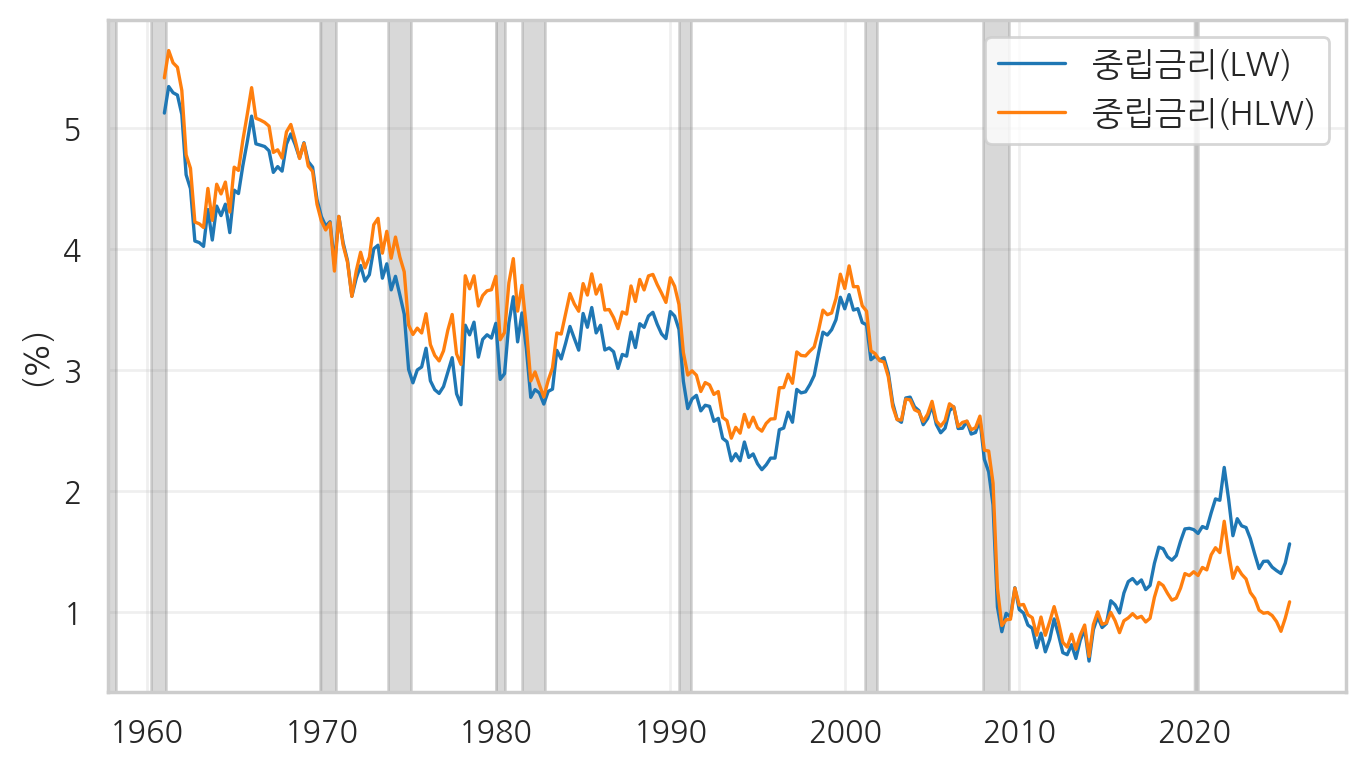

In [ ]:
df_compare = pd.concat([df_LW['rstar_LW'], df_HLW['rstar_US']], axis=1)
start_date, end_date = 1961, 2025
df_sub = df_compare.loc[f"{start_date}":f"{end_date}"].copy()

fig, ax1, ax2 = plot_dual_axis(
    df=df_sub,
    left_vars=['rstar_LW', 'rstar_US'],
    linewidth=1.2,
    figsize=(7, 4),
    left_label='(%)',
    y_left_format='{x:,.0f}',
    legend_labels=['중립금리(LW)', '중립금리(HLW)'],
    legend_fontsize=12,
    legend_loc='upper right',
    return_axes=True,
    show=False
)

plot_nber_recession(ax1, NBERm)

save_fig('rstar_LW_HLW')
plt.show()


In [ ]:
df_compare.tail(5)

,rstar_LW,rstar_US
Date,,
2024-07-01,1.370,0.970
2024-10-01,1.341,0.920
2025-01-01,1.317,0.840
2025-04-01,1.404,0.948
2025-07-01,1.563,1.084


## 필립스 커브

### 필립스 커브 평탄화

- This exercise is to replicate the figure in https://www.economist.com/graphic-detail/2017/11/01/the-phillips-curve-may-be-broken-for-good
- Prof. Nakamura's lecture: https://www.youtube.com/watch?v=ydlsC5pVOdE

In [ ]:
# NROU = natural rate of unemployment (made by CB)
# UNRATE = unemployment rate
# BPCCRO1Q156NBEA = Personal Consumption Expenditures excluding Food and Energy (chain-type price index)

var_list = ['NROU','UNRATE','BPCCRO1Q156NBEA']
start = date(1975,1,1)
end = date(2019,12,31)

df = pdr.get_data_fred(var_list, start=start, end=end)
df.columns = ['nr','unemploy','core']
print(df.head())

              nr  unemploy   core
DATE                             
1975-01-01 6.171     8.100 10.100
1975-02-01   NaN     8.100    NaN
1975-03-01   NaN     8.600    NaN
1975-04-01 6.180     8.800  9.100
1975-05-01   NaN     9.000    NaN


In [ ]:
df = df.resample('QE').mean()
df.head(4)

,nr,unemploy,core
DATE,,,
1975-03-31,6.171,8.267,10.100
1975-06-30,6.180,8.867,9.100
1975-09-30,6.189,8.467,7.600
1975-12-31,6.197,8.300,6.800


In [ ]:
# 자연실업률에서 벗어난 경기실업률 계산
df['cycle_unemploy'] = df['unemploy'] - df['nr']

In [ ]:
# make period dummies

df['period'] = (df.index.year < 1985 ).astype(int)
df.loc[(df.index.year > 1984) & (df.index.year< 1995) , 'period'] = 2
df.loc[(df.index.year > 1994) , 'period'] = 3

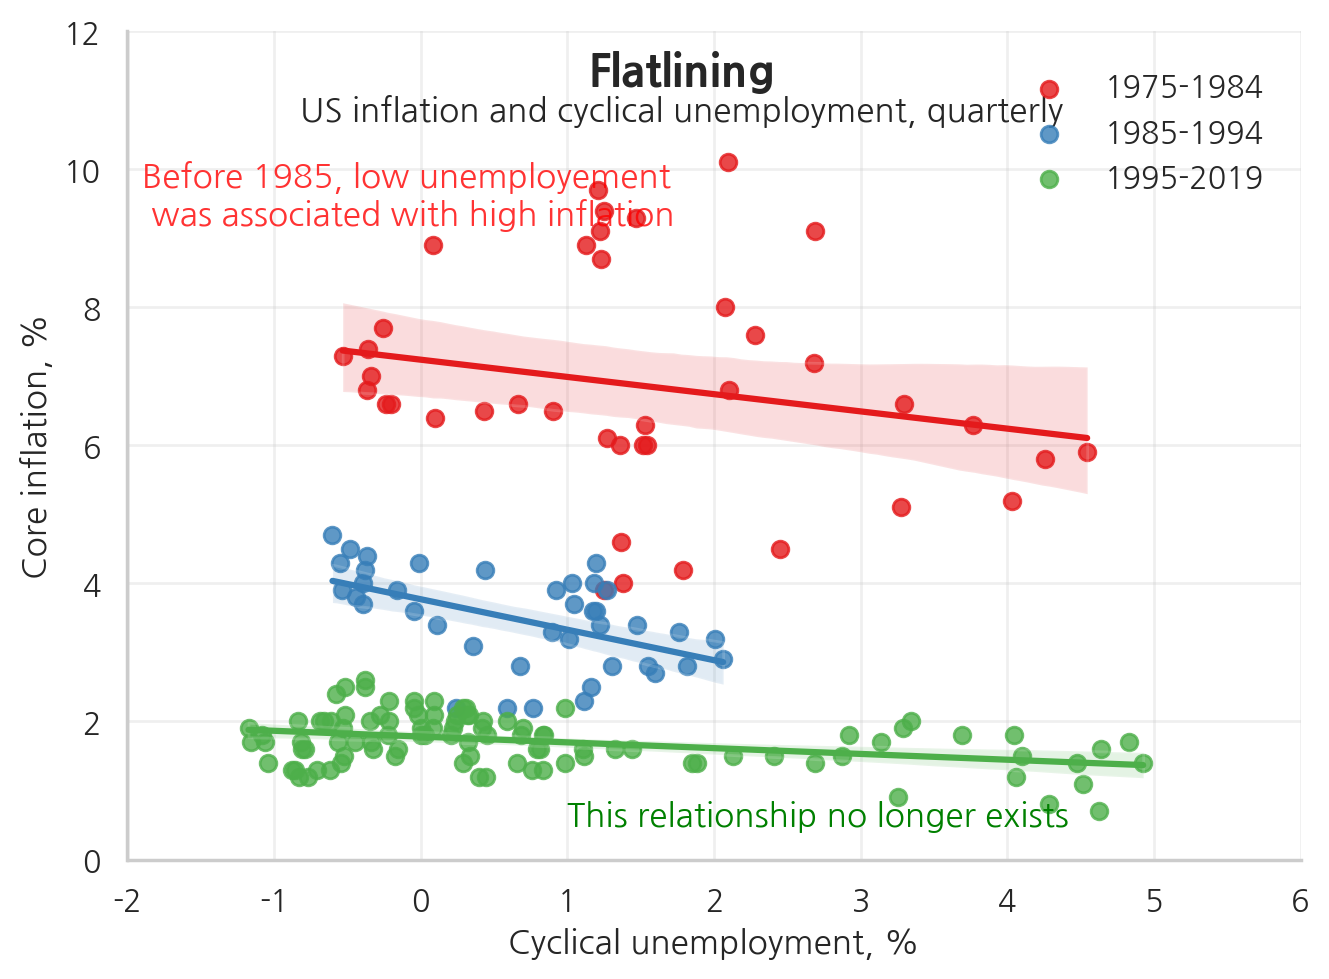

In [ ]:
import seaborn as sns

ax2 = sns.lmplot(x='cycle_unemploy',y='core', hue='period', data=df, palette="Set1",facet_kws={'legend_out': True})
ax2.set_axis_labels("Cyclical unemployment, %", "Core inflation, %")
ax2.set(xlim=(-2, 6), ylim=(0, 12))
#plt.legend(title='', loc='upper right', labels=['1975-1984','1985-1994','1995-2019'])
#ax2.ax.legend()
# title
new_title = ''
ax2._legend.set_title(new_title)
# replace labels
new_labels = ['1975-1984', '1985-1994','1995-2019']
for t, l in zip(ax2._legend.texts, new_labels):
    t.set_text(l)
sns.move_legend(ax2, loc='upper right', bbox_to_anchor=(.87, .95), title='')
#plt.figure(figsize=(8,5))
ax2.fig.set_figwidth(8)
ax2.fig.set_figheight(5)

plt.text(x=1, y=2.5, s='Flatlining', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
plt.text(x=1, y=2.4, s='US inflation and cyclical unemployment, quarterly', fontsize=12, ha='center', va='bottom', transform=ax.transAxes)

# add text annotation
plt.text(-1.9, 9.2, "Before 1985, low unemployement\n was associated with high inflation", horizontalalignment='left', alpha = 0.8, size='medium', color='red')
plt.text(1, 0.5, "This relationship no longer exists", horizontalalignment='left', size='medium', color='green')

plt.grid(True)
#plt.savefig('PC.png')
plt.show()



Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/PC_flat.png


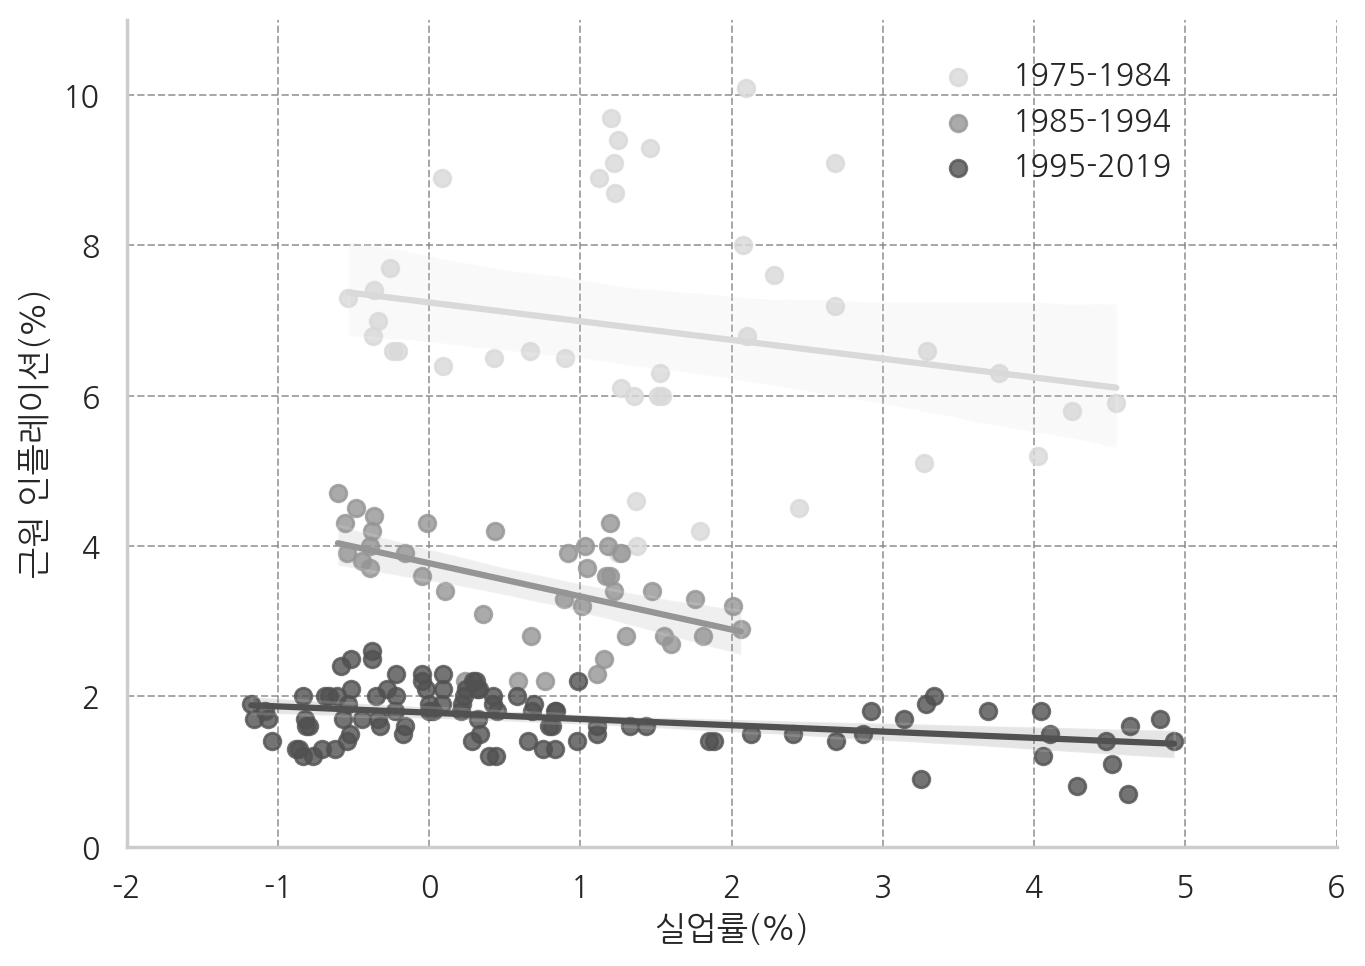

In [ ]:
ax = sns.lmplot(
    x='cycle_unemploy', y='core',
    hue='period', data=df,
    palette="Greys",   # 흑백 팔레트
    facet_kws={'legend_out': True}
)

# 축 라벨과 범위
ax.set_axis_labels("실업률(%)", "근원 인플레이션(%)")
ax.set(xlim=(-2, 6), ylim=(0, 11))

# 범례
ax._legend.set_title('')
new_labels = ['1975-1984', '1985-1994','1995-2019']
for t, l in zip(ax._legend.texts, new_labels):
    t.set_text(l)
sns.move_legend(ax, loc='upper right', bbox_to_anchor=(.87, .95), title='')

# 그림 크기
ax.fig.set_figwidth(7)
ax.fig.set_figheight(5)

# Grid 추가 (FacetGrid 내부의 모든 axes에 적용)
for a in ax.axes.flat:
    a.grid(True, linestyle="--", linewidth=0.7, color="gray", alpha=0.7)

save_fig('PC_flat')
plt.show()

### 미국 최근 실업률과 인플레이션

In [ ]:
# Unemployment Rate  (UNRATE)
# Personal Consumption Expenditures (PCE) Excluding Food and Energy (Chain-Type Price Index)  (DPCCRV1Q225SBEA)

var_list = ['UNRATE', 'DPCCRV1Q225SBEA']
start = date(2012,1,1)
end = date(2019,12,30)

pc_us = pdr.get_data_fred(var_list, start=start, end=end)
pc_us.columns = ['실업률','PCE 근원 인플레이션']

pc_us.head(8)

,실업률,PCE 근원 인플레이션
DATE,,
2012-01-01,8.300,2.500
2012-02-01,8.300,NaN
2012-03-01,8.200,NaN
2012-04-01,8.200,1.700
2012-05-01,8.200,NaN
2012-06-01,8.200,NaN
2012-07-01,8.200,1.200
2012-08-01,8.100,NaN


In [ ]:
# 분기별 리샘플링
df_q = pd.DataFrame({
    '실업률': pc_us['실업률'].resample('QE').mean(),
    'PCE 근원 인플레이션': pc_us['PCE 근원 인플레이션'].resample('QE').last()
})

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/US_unem_inf.png


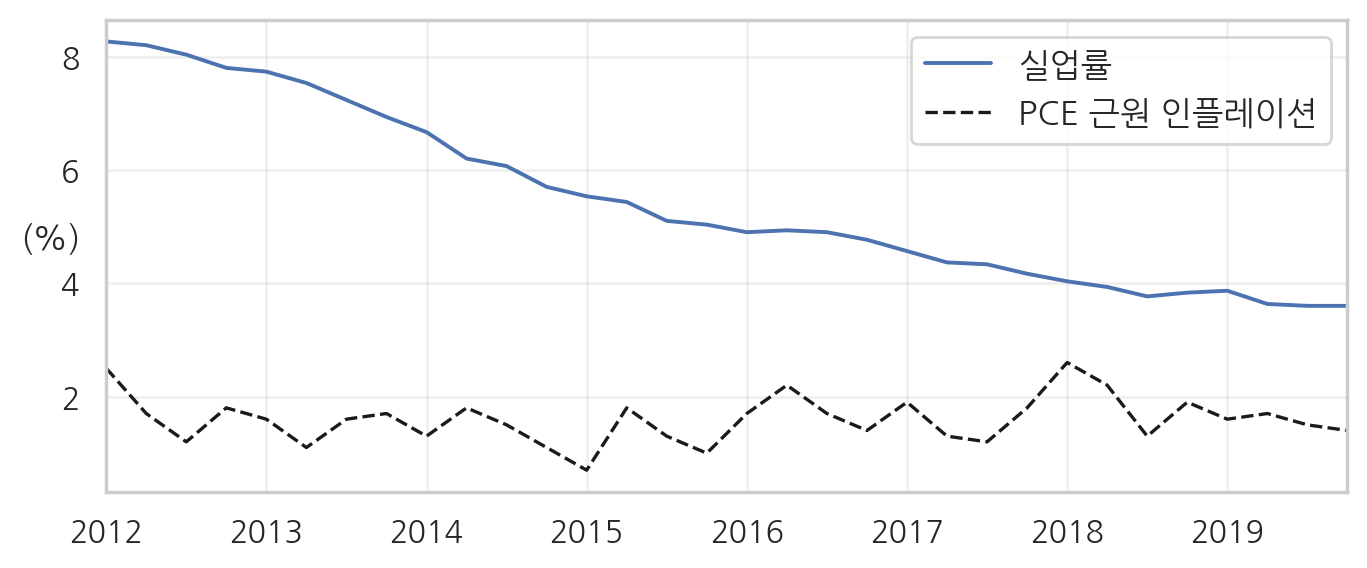

In [ ]:
start_date = 2012
end_date = 2019

linewidth = 1.2
ax = df_q.loc[str(start_date):str(end_date),'실업률'].plot(figsize=(7,3), linewidth=1.4)
ax = df_q.loc[str(start_date):str(end_date),'PCE 근원 인플레이션'].plot(color='k', linestyle='--', linewidth=linewidth)

plt.legend(labels=['실업률','PCE 근원 인플레이션'],
           fontsize=12, loc='upper right')

plt.xlabel('')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel('(%)', rotation=0)
ax.grid(True)

save_fig('US_unem_inf')
plt.show()

## 베버리지 곡선

- ["베버리지 곡선은 노동시장의 회복상에 대해 무엇을 말해 주는가?"](https://www.stlouisfed.org/on-the-economy/2022/jul/beveridge-curve-labor-market-recovery) (세인트루이스 연준 블로그, 2022.7)
- ["최근 베버리지 곡선은 왜 급격하게 이동했는가?"](https://www.richmondfed.org/publications/research/economic_brief/2021/eb_21-36) (리치몬드 연준 Economic Brief, 2021.10)  
- ["베버리지 곡선을 통한 노동시장 평가: 미국과의 비교를 중심으로"](https://www.bok.or.kr/portal/bbs/B0000347/view.do?nttId=10072542&menuNo=201106) (한국은행 블로그, 2022.8)

In [ ]:
var_list = ['UNRATE', 'JTSJOR']
start = date(2001,1,1)
end = date(2025,5,31)

bc_all = pdr.get_data_fred(var_list, start=start, end=end)
bc_all.columns = ['unrate','vacancy']
bc_all.head()

,unrate,vacancy
DATE,,
2001-01-01,4.200,3.800
2001-02-01,4.200,3.700
2001-03-01,4.300,3.500
2001-04-01,4.400,3.400
2001-05-01,4.300,3.200


Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/unrate_vacancy.png


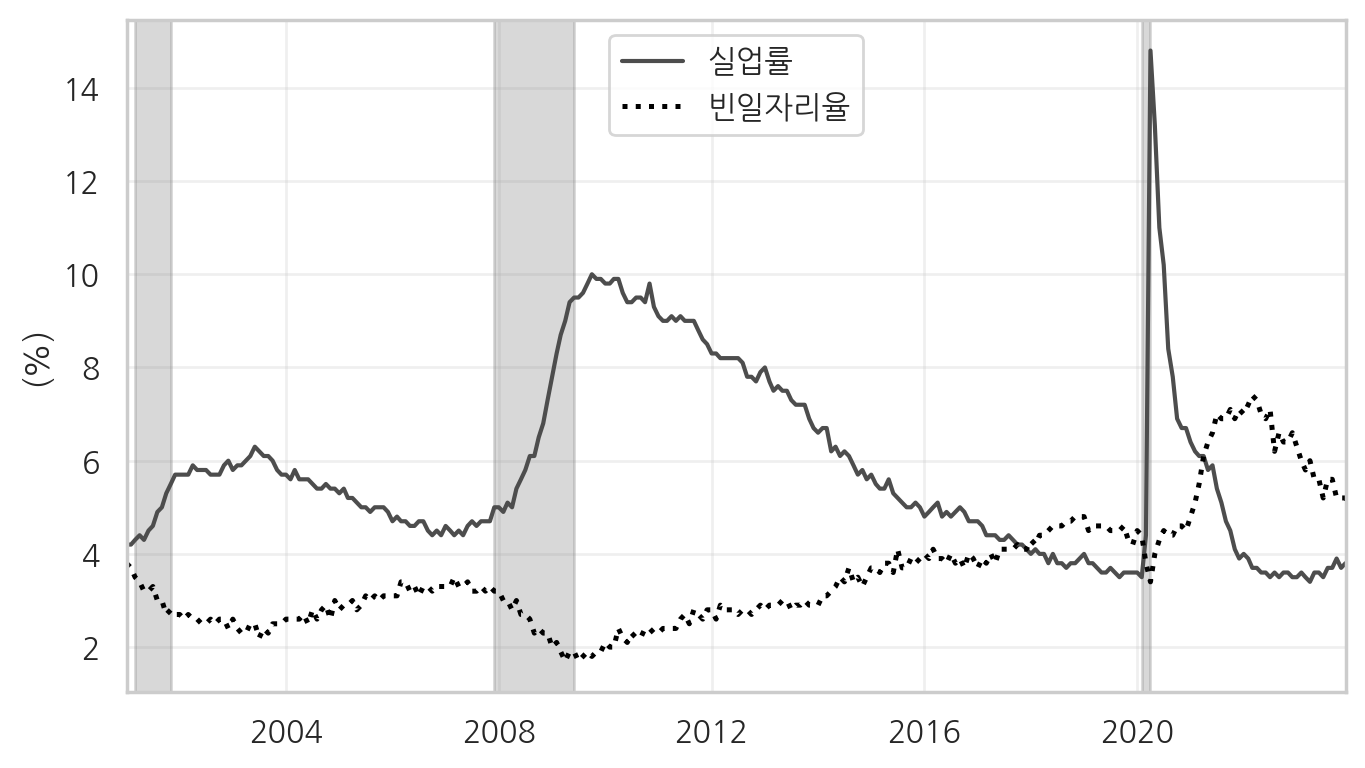

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))

# 개별 컬럼 스타일 지정
ax.plot(bc_all.index, bc_all['unrate'],   linestyle='-', color='0.3',  linewidth=1.5, label='실업률')
ax.plot(bc_all.index, bc_all['vacancy'],  linestyle=':', color='black', linewidth=1.8, label='빈일자리율')

ax.set_ylabel('(%)')
ax.set_xlim(date(2001, 1, 1), date(2023, 12, 1))

plot_nber_recession(ax, NBERm, label=None)
ax.grid(alpha=0.3)
ax.legend()

save_fig('unrate_vacancy')
plt.show()


Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/beveridge1.png


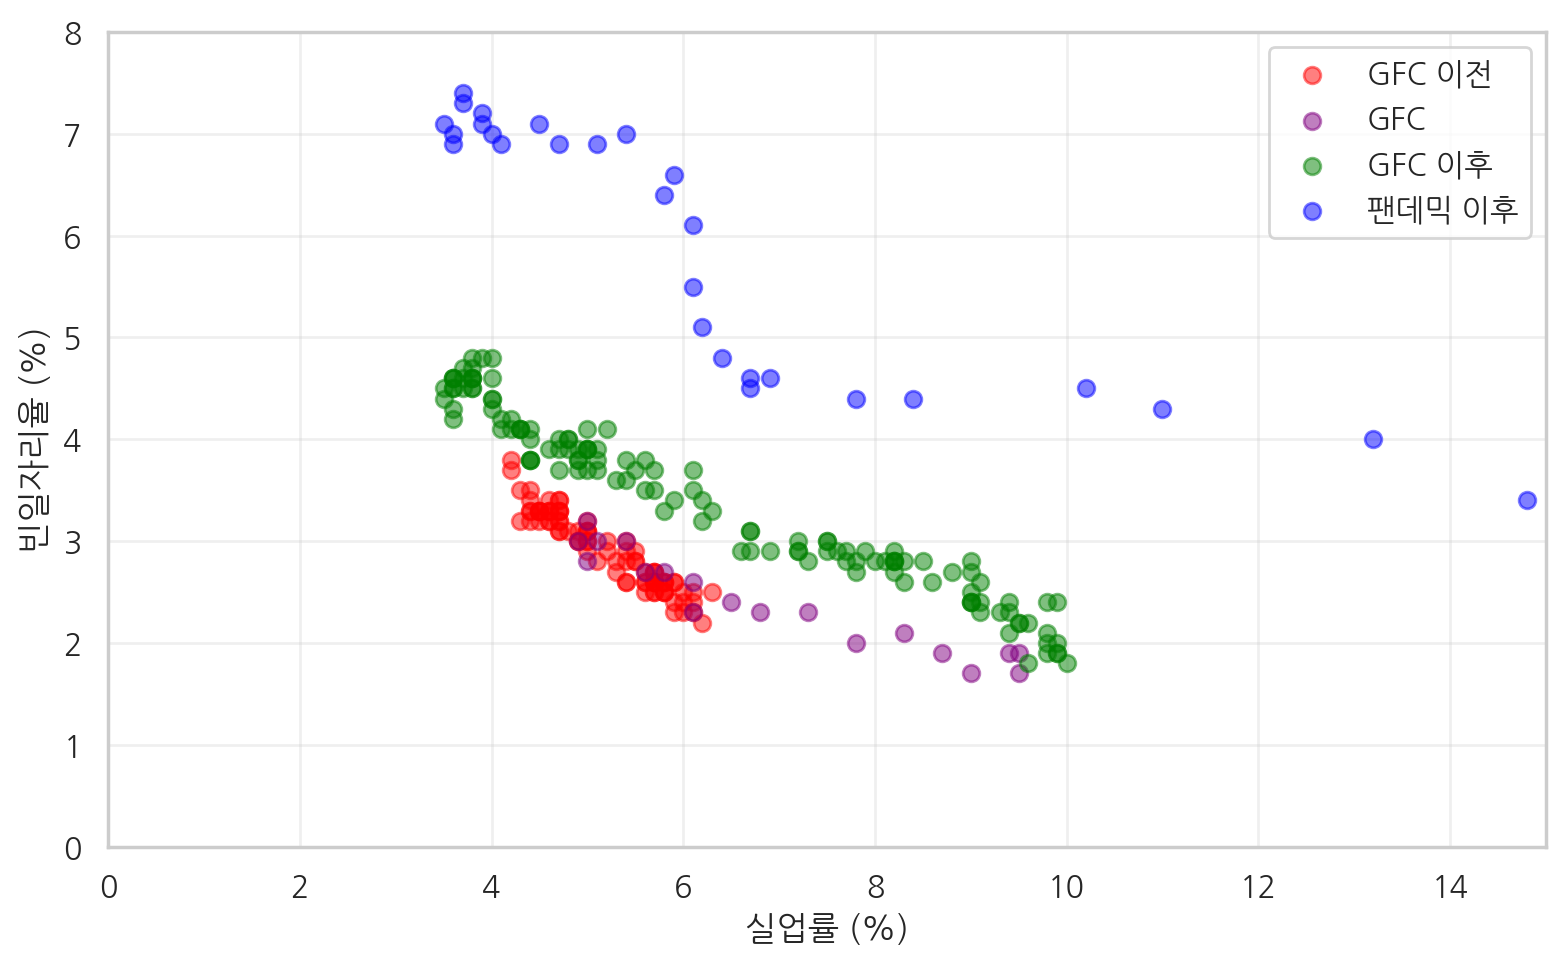

In [ ]:
bc = bc_all.loc['2001-01':'2022-07',:]

# Define periods of interest
date1, date2 = '2001-01', '2007-12'   # GFC 이전
date3, date4 = '2008-01', '2009-07'   # GFC
date5, date6 = '2009-08', '2020-03'   # GFC 이후
date7, date8 = '2020-04', '2022-07'   # 팬데믹 이후
#date7, date8 = '2020-04', '2023-08'   # 팬데믹 이후

# Scatter plots by period
plt.scatter(
    bc.loc[date1:date2, 'unrate'], bc.loc[date1:date2, 'vacancy'],
    c='red', alpha=0.5, label='GFC 이전'
)
plt.scatter(
    bc.loc[date3:date4, 'unrate'], bc.loc[date3:date4, 'vacancy'],
    c='purple', alpha=0.5, label='GFC'
)
plt.scatter(
    bc.loc[date5:date6, 'unrate'], bc.loc[date5:date6, 'vacancy'],
    c='green', alpha=0.5, label='GFC 이후'
)
plt.scatter(
    bc.loc[date7:date8, 'unrate'], bc.loc[date7:date8, 'vacancy'],
    c='blue', alpha=0.5, label='팬데믹 이후'
)

# Axis labels and limits
plt.xlabel('실업률 (%)')
plt.ylabel('빈일자리율 (%)')
plt.xlim(0, 15)
plt.ylim(0, 8)

# Legend
plt.legend()

plt.grid(True)

# Save & show
save_fig('beveridge1')
plt.show()


Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/beveridge1_bw_markers.png


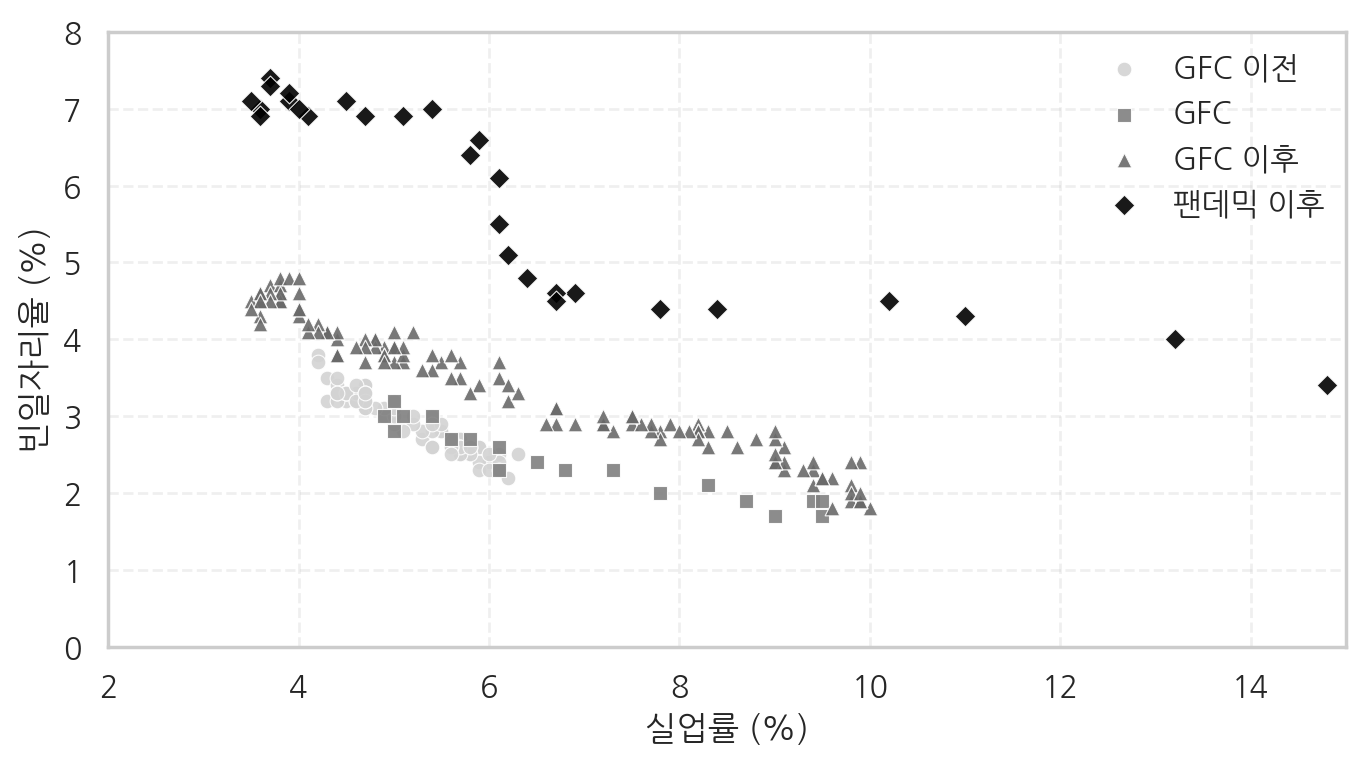

In [ ]:
# --- Figure size 지정 ---
plt.figure(figsize=(7, 4))

# --- Periods (start, end) ---
periods = {
    'GFC 이전'   : ('2000-12', '2007-12'),
    'GFC'       : ('2008-01', '2009-07'),
    'GFC 이후'  : ('2009-08', '2020-03'),
    '팬데믹 이후': ('2020-04', '2023-08'),
}

# --- Grayscale + marker styles (safe for b/w printing) ---
styles = {
    'GFC 이전'   : dict(color='lightgray', marker='o'),  # ●
    'GFC'       : dict(color='gray', marker='s'),        # ■
    'GFC 이후'  : dict(color='dimgray', marker='^'),     # ▲
    '팬데믹 이후': dict(color='black', marker='D'),      # ◆
}

# --- Plot ---
for label, (start, end) in periods.items():
    st = styles[label]
    plt.scatter(
        bc.loc[start:end, 'unrate'],
        bc.loc[start:end, 'vacancy'],
        c=st['color'],
        marker=st['marker'],
        s=28,
        alpha=0.9,
        edgecolors='white',  # 점 경계선으로 흑백 인쇄 시 구분 강화
        linewidths=0.4,
        label=label
    )

# Axes & labels
plt.xlabel('실업률 (%)')
plt.ylabel('빈일자리율 (%)')
plt.xlim(2, 15)
plt.ylim(0, 8)
plt.grid(alpha=0.3, linestyle='--')

# Legend tuned for print
plt.legend(frameon=False, handletextpad=0.6, borderpad=0.2, fontsize=11)

save_fig('beveridge1_bw_markers')
plt.show()

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/beveridge2.png


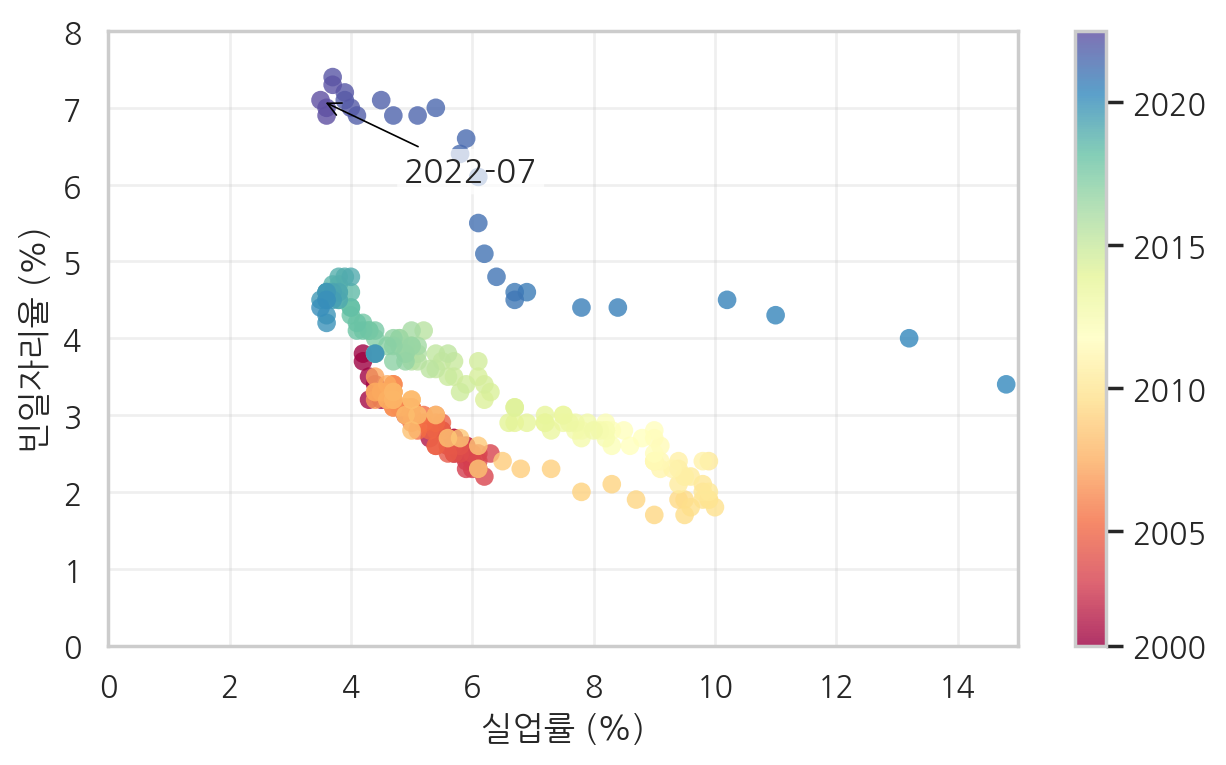

In [ ]:
# Plot the modified Beveridge curve for the US: vacancy (market tightness proxy) vs unemployment
fig, ax = plt.subplots(figsize=(6.5, 4))

# color by time index order
c = np.arange(len(bc))  # assumes bc is sorted by date
sc = ax.scatter(
    bc['unrate'], bc['vacancy'],
    s=45, c=c, alpha=0.8, cmap='Spectral', edgecolors='none'
)

ax.set_xlabel('실업률 (%)')
ax.set_ylabel('빈일자리율 (%)')
ax.set_xlim(0, 15)
ax.set_ylim(0, 8)
ax.grid(True, alpha=0.3)

# Colorbar hooked to the scatter "mappable"
cbar = fig.colorbar(sc, ax=ax)

# Put ticks every 5 years starting 2000 (nearest index if exact date not present)
years = np.arange(2000, bc.index[-1].year + 1, 5)
tick_dates = pd.to_datetime([f'{y}-01-01' for y in years])
# positions along c = 0..len(bc)-1:
tick_pos = bc.index.get_indexer(tick_dates, method='nearest')
cbar.set_ticks(tick_pos)
cbar.set_ticklabels([str(y) for y in years])

# Annotate the latest observation without overlapping the scatter point
last = bc.iloc[-1]
ax.annotate(
    last.name.strftime('%Y-%m'),
    xy=(last['unrate'], last['vacancy']),
    xytext=(30, -20),  # moved further away to the bottom-right
    textcoords='offset points',
    ha='left', va='top',
    arrowprops=dict(arrowstyle='->', lw=0.6, color='black'),
    bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.7)  # optional: white background
)

plt.tight_layout()
save_fig('beveridge2')
plt.show()

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/beveridge2_title.png


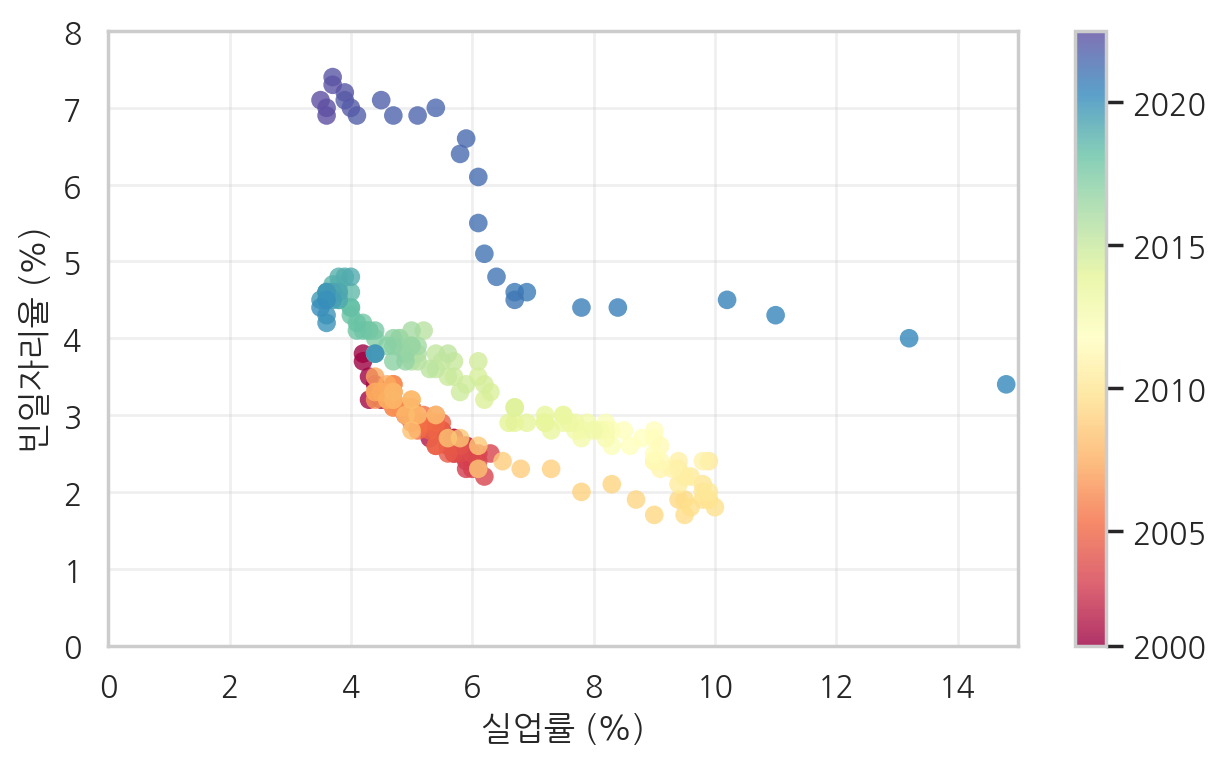

In [ ]:
# Plot the modified Beveridge curve for the US: vacancy (market tightness proxy) vs unemployment
fig, ax = plt.subplots(figsize=(6.5, 4))

# color by time index order
c = np.arange(len(bc))  # assumes bc is sorted by date
sc = ax.scatter(
    bc['unrate'], bc['vacancy'],
    s=45, c=c, alpha=0.8, cmap='Spectral', edgecolors='none'
)

ax.set_xlabel('실업률 (%)')
ax.set_ylabel('빈일자리율 (%)')
ax.set_xlim(0, 15)
ax.set_ylim(0, 8)
ax.grid(True, alpha=0.3)

# Colorbar hooked to the scatter "mappable"
cbar = fig.colorbar(sc, ax=ax)

# Put ticks every 5 years starting 2000 (nearest index if exact date not present)
years = np.arange(2000, bc.index[-1].year + 1, 5)
tick_dates = pd.to_datetime([f'{y}-01-01' for y in years])
# positions along c = 0..len(bc)-1:
tick_pos = bc.index.get_indexer(tick_dates, method='nearest')
cbar.set_ticks(tick_pos)
cbar.set_ticklabels([str(y) for y in years])

plt.tight_layout()
save_fig('beveridge2_title')
plt.show()


Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/beveridge2_bw.png


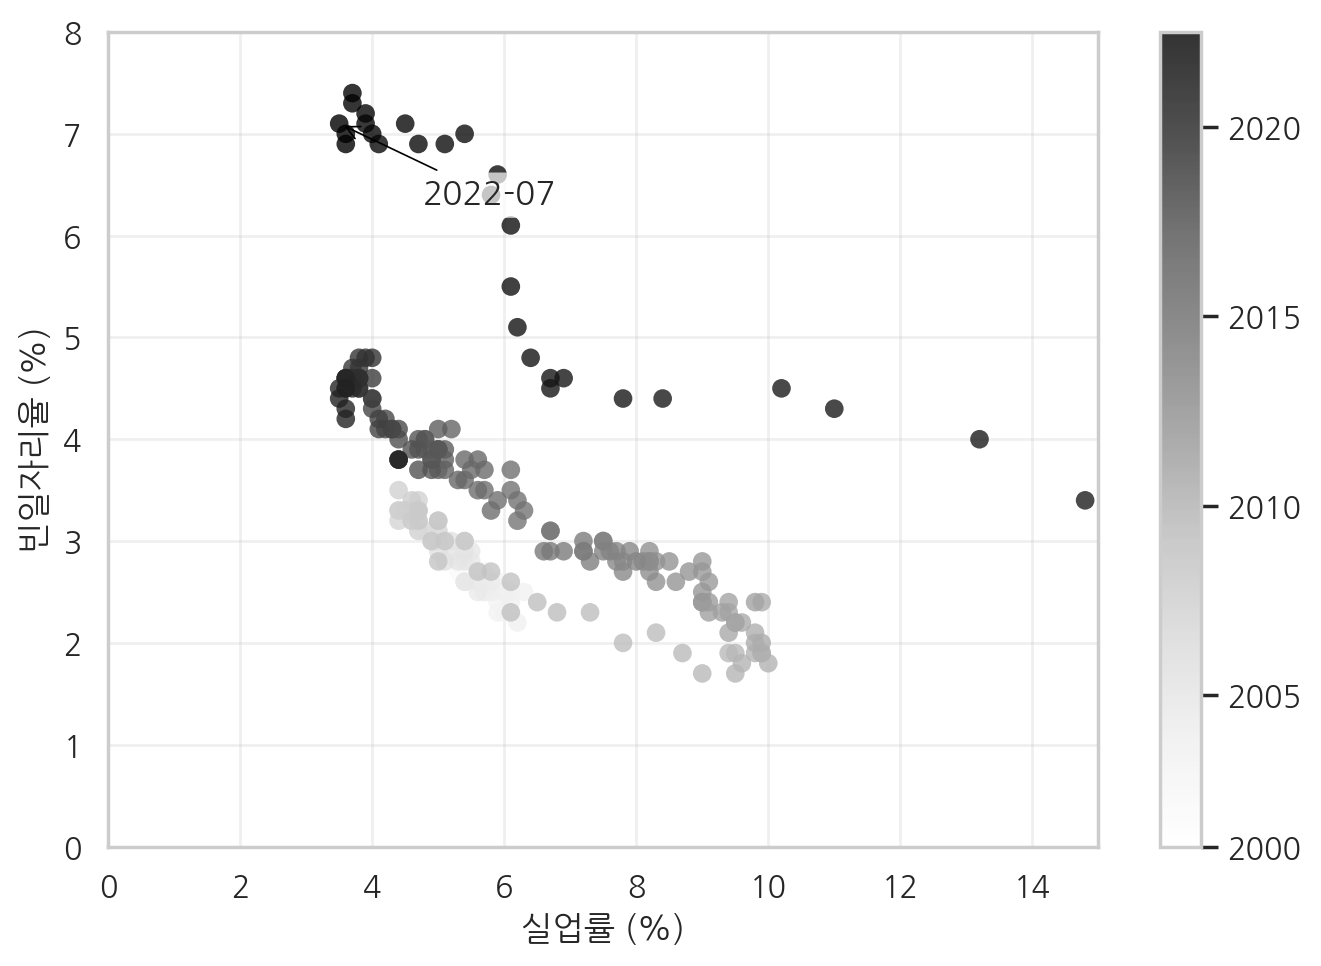

In [ ]:
# Plot the modified Beveridge curve for the US: vacancy vs unemployment (black & white version)
fig, ax = plt.subplots(figsize=(7, 5))

# Use grayscale colormap
c = np.arange(len(bc))  # time order
sc = ax.scatter(
    bc['unrate'], bc['vacancy'],
    s=45, c=c, alpha=0.8, cmap='Greys', edgecolors='none'
)

ax.set_xlabel('실업률 (%)')
ax.set_ylabel('빈일자리율 (%)')
ax.set_xlim(0, 15)
ax.set_ylim(0, 8)
ax.grid(True, alpha=0.3)

# Colorbar in grayscale
cbar = fig.colorbar(sc, ax=ax)

# Put ticks every 5 years starting 2000
years = np.arange(2000, bc.index[-1].year + 1, 5)
tick_dates = pd.to_datetime([f'{y}-01-01' for y in years])
tick_pos = bc.index.get_indexer(tick_dates, method='nearest')
cbar.set_ticks(tick_pos)
cbar.set_ticklabels([str(y) for y in years])

# Annotate the latest observation without overlapping the scatter point
last = bc.iloc[-1]
ax.annotate(
    last.name.strftime('%Y-%m'),
    xy=(last['unrate'], last['vacancy']),
    xytext=(30, -20),
    textcoords='offset points',
    ha='left', va='top',
    arrowprops=dict(arrowstyle='->', lw=0.6, color='black'),
    bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.7)
)

plt.tight_layout()
save_fig('beveridge2_bw')
plt.show()


Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/beveridge3_bw.png


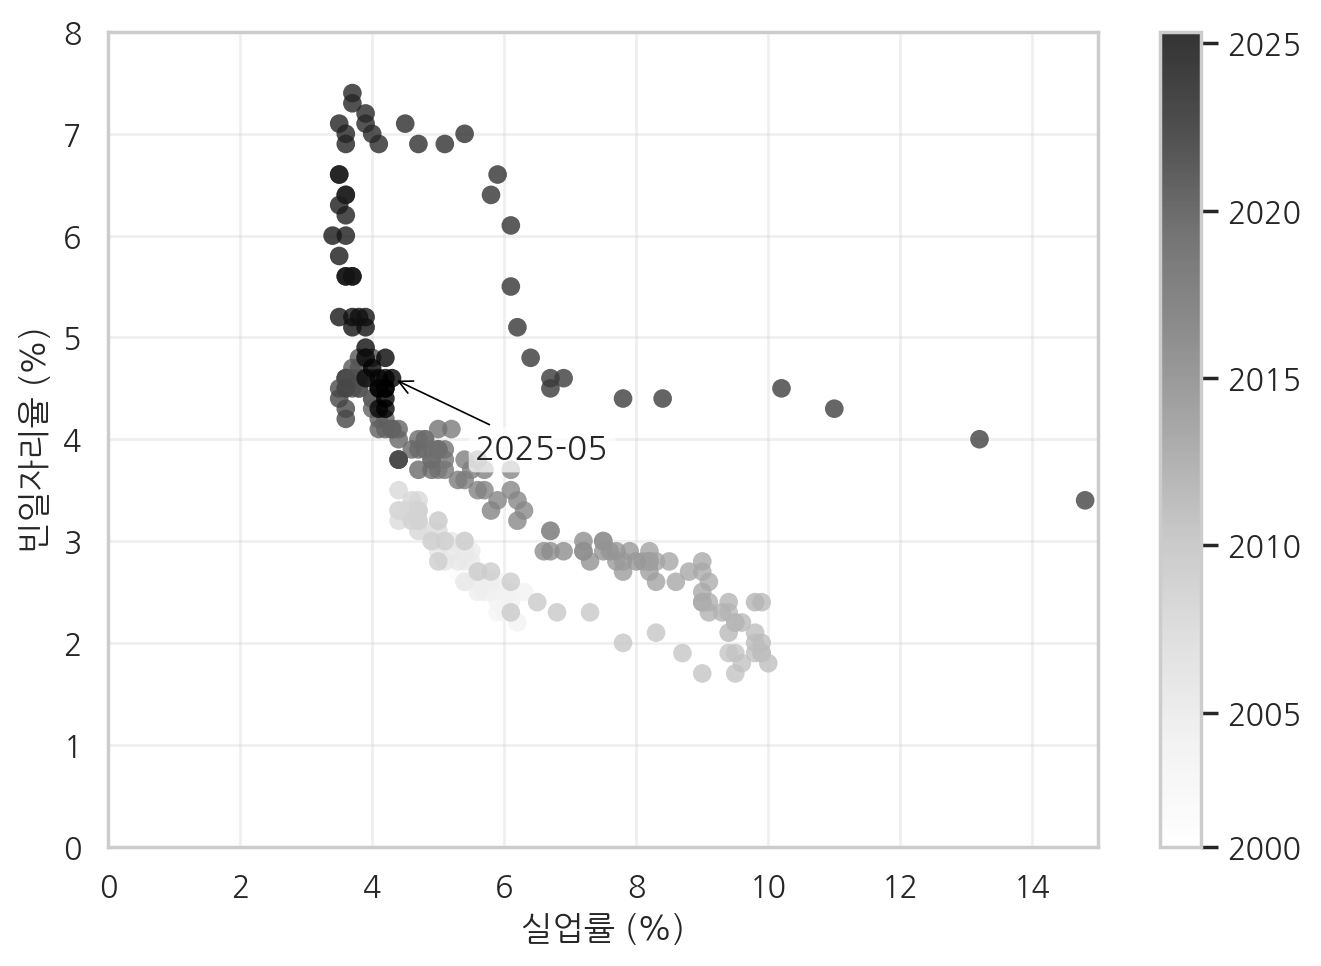

In [ ]:
# full sample period

bc = bc_all

# Plot the modified Beveridge curve for the US: vacancy vs unemployment (black & white version)
fig, ax = plt.subplots(figsize=(7, 5))

# Use grayscale colormap
c = np.arange(len(bc))  # time order
sc = ax.scatter(
    bc['unrate'], bc['vacancy'],
    s=45, c=c, alpha=0.8, cmap='Greys', edgecolors='none'
)

ax.set_xlabel('실업률 (%)')
ax.set_ylabel('빈일자리율 (%)')
ax.set_xlim(0, 15)
ax.set_ylim(0, 8)
ax.grid(True, alpha=0.3)

# Colorbar in grayscale
cbar = fig.colorbar(sc, ax=ax)

# Put ticks every 5 years starting 2000
years = np.arange(2000, bc.index[-1].year + 1, 5)
tick_dates = pd.to_datetime([f'{y}-01-01' for y in years])
tick_pos = bc.index.get_indexer(tick_dates, method='nearest')
cbar.set_ticks(tick_pos)
cbar.set_ticklabels([str(y) for y in years])

# Annotate the latest observation without overlapping the scatter point
last = bc.iloc[-1]
ax.annotate(
    last.name.strftime('%Y-%m'),
    xy=(last['unrate'], last['vacancy']),
    xytext=(30, -20),
    textcoords='offset points',
    ha='left', va='top',
    arrowprops=dict(arrowstyle='->', lw=0.6, color='black'),
    bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.7)
)

plt.tight_layout()
save_fig('beveridge3_bw')
plt.show()